TextPreprocessing+Bigram + Machine Learning Classifier

**Import Libraries**

In [ ]:
### For computational and random seed purpose
import numpy as np
np.random.seed(42)
#to read csv file
import pandas as pd
#To split into train and cv data
from sklearn.model_selection import train_test_split
#To compute AUROC
from sklearn.metrics import auc,roc_auc_score
#for AUROC graph
import matplotlib.pyplot as plt
#for oversampling technique
from imblearn.over_sampling import SMOTE # (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
#Data is imbalanced, we need calibrated model
from sklearn.calibration import CalibratedClassifierCV
#for hyperparameter tuning and Cross-validation fold
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold
#to ignore the error message
import warnings
warnings.filterwarnings("ignore")
#for heatmap and other plotting technique
import seaborn as sns
#to strandize the real value data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#To create Knn model on datasets
from sklearn.neighbors import KNeighborsClassifier
#for accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
# For applying model on datasets
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

#using simple network
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import RobustScaler

In [ ]:
data = pd.read_csv("Modified_SQL_Dataset.csv")

In [ ]:
data.drop_duplicates(inplace=True)
data.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [ ]:
data.shape

(30907, 2)

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import word2vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#printing some random variable
sent_0 = data['Query'].values[0]
print(sent_0)
print("="*50)

sent_2000 = data['Query'].values[2000]
print(sent_2000)
print("="*50)

sent_15000 = data['Query'].values[15000]
print(sent_15000)
print("="*50)

sent_20000 = data['Query'].values[20000]
print(sent_20000)
print("="*50)

" or pg_sleep  (  __TIME__  )  --
-6073"   )    )     )   or 9502  =  2012#
wilson@autoconstruccion.fi
  SELECT SUBSTR ( "SQL Tutorial", -5, 5 )  AS ExtractString;


In [ ]:
#remove the special Character :  https://stackoverflow.com/a/5843547/4084039
sent_15000 = re.sub('[^A-Za-z0-9]+',' ',sent_15000)
print(sent_15000)

wilson autoconstruccion fi


In [ ]:
sent_20000 = re.sub('[^A-Za-z0-9]+',' ',sent_20000)
print(sent_20000)

 SELECT SUBSTR SQL Tutorial 5 5 AS ExtractString 


In [ ]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_query = []
lemmatizer = WordNetLemmatizer()
# tqdm is for printing the status bar
for sentance in tqdm(data['Query'].values):
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
    sentance = re.sub(r',', ' ', sentance)
    #https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    tokenization = nltk.word_tokenize(sentance)
    sentance = ' '.join([lemmatizer.lemmatize(w) for w in tokenization])
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_query.append(sentance.strip())

100%|██████████| 30907/30907 [00:08<00:00, 3845.06it/s]


In [ ]:
preprocessed_query

['pg sleep time',
 'create user name identified pass123 temporary tablespace temp default tablespace user',
 '1 utl inaddr get host address select distinct table name select distinct table name rownum limit sys table limit 5',
 'select user id 1 1 1 union select 1 version 1',
 'select user id 1 1 union select 1 version 1',
 'select name syscolumns id select id sysobjects name tablename',
 'select user id 1 1 1 1',
 '1 load file char 47 101 116 99 47 112 97 115 115 119 100 1 1 1',
 'select user id 1 1 1 union select 1 version 1',
 'select user id 1 union select 1 version 1',
 '1 1',
 '',
 'admin 1 1',
 'select user id 1 1 1 1',
 '1 1',
 '1 utl inaddr get host address select distinct column name select distinct column name rownum limit tab column limit 5',
 'select user id 1 union select 1 version 1',
 'select user id 1 1 1 1',
 'select user id 1 1 1 1',
 'distinct',
 'select user id 1 1 1 1',
 '1 ascii lower substring select top 1 name sysobjects xtype u 1 1 116',
 'select user id 1 1 1

In [ ]:
data['Query'] = preprocessed_query

In [ ]:
X = data.drop(['Label'],axis=1)
y = data['Label']

**Splitting data into Train and cross validation(or test) : Stratified Sampling**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y) # We split the train data and test data of both X(input features)
# and Y(class_lable)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24725, 1)
(24725,)
(6182, 1)
(6182,)


**Bi-Gram**

In [ ]:
#Bi-gram
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
X_train_bigram = count_vect.fit_transform(X_train['Query'])
X_test_bigram = count_vect.transform(X_test['Query'])

print(X_train_bigram.shape)
print(X_test_bigram.shape)

(24725, 2723)
(6182, 2723)


In [ ]:
#kNN (See Docs: https://scikit-learn.org/stable/modules/generated/sklearn.→neighbors.KNeighborsClassifier.html)
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


parameters = {'n_neighbors':[1,3,5,7,10,11,15,10,50,75,80,85,90,95,100]}
rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
clf = KNeighborsClassifier()

grid = GridSearchCV(estimator = clf, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bigram,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 11 folds for each of 15 candidates, totalling 165 fits
Best Score:0.9414653294071536
Best Parameters: {'n_neighbors': 7}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train_bigram,y_train)
y_pred = clf.predict(X_train_bigram)
knn_train_auc = roc_auc_score(y_train,y_pred)
print(knn_train_auc)


0.8987823506669236


In [ ]:
y_test_pred = clf.predict(X_test_bigram)
knn_test_auc = roc_auc_score(y_test,y_test_pred)
print(knn_test_auc)

0.8827513572467935


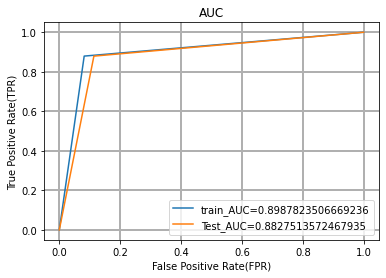

In [ ]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [ ]:
print("f1-score:",f1_score(y_test,y_test_pred))

f1-score: 0.847701758102097


**Logistic Regression**

In [ ]:
#ref https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
parameters = {'penalty':['l1', 'l2'], 'C':[0.001,0.01,0.1,1,10],'solver':['liblinear','saga','sag']}
rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
clf = LogisticRegression(random_state=42)

grid = GridSearchCV(estimator = clf, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bigram,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))




Fitting 11 folds for each of 30 candidates, totalling 330 fits
Best Score:0.973924302457123
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
clf = LogisticRegression(C=10,penalty='l2',solver='liblinear')
clf.fit(X_train_bigram,y_train)

y_pred = clf.predict(X_train_bigram)
logistic_train_auc = roc_auc_score(y_train,y_pred)
print(logistic_train_auc)

0.9336137323973426


In [ ]:
y_test_pred = clf.predict(X_test_bigram)
logistic_test_auc = roc_auc_score(y_test,y_test_pred)
print(logistic_test_auc)

0.9281131637416007


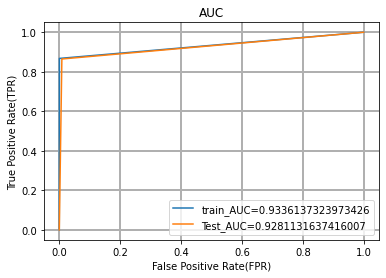

In [ ]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [ ]:
print("f1-score:",f1_score(y_test,y_test_pred))

f1-score: 0.9202712181435585


**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#ref https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}

rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
clf = MultinomialNB()

grid = GridSearchCV(estimator = clf, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bigram,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 11 folds for each of 9 candidates, totalling 99 fits
Best Score:0.9685574500701094
Best Parameters: {'alpha': 1e-05}


In [ ]:
clf = MultinomialNB(alpha=1e-05)
clf.fit(X_train_bigram,y_train)

y_pred = clf.predict(X_train_bigram)
multinomial_train_auc = roc_auc_score(y_train,y_pred)
print(multinomial_train_auc)

0.9183505139284064


In [ ]:
y_test_pred = clf.predict(X_test_bigram)
multinomial_test_auc = roc_auc_score(y_test,y_test_pred)
print(multinomial_test_auc)

0.916687926375267


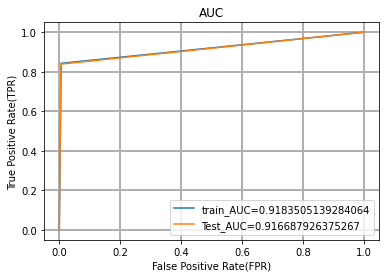

In [ ]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [ ]:
print("f1-score:",f1_score(y_test,y_test_pred))

f1-score: 0.9077508321445553


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
#ref = https://scikit-learn.org/stable/modules/svm.html


parameters = {'C':[10**i for i in range(-4,5)],'kernel':['linear','poly','sigmoid','rdf']}

#The instance of SVC
rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
svc_model = SVC(random_state=42)
#Used GridserachCV for Hyper-parameter
grid = GridSearchCV(estimator = svc_model, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bigram,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))


Fitting 11 folds for each of 36 candidates, totalling 396 fits
Best Score:0.9688635297187218
Best Parameters: {'C': 1, 'kernel': 'linear'}


In [29]:
svc_clf = SVC(C = 1, kernel = 'linear')
svc_clf.fit(X_train_bigram,y_train)

y_pred = svc_clf.predict(X_train_bigram)
svm_train_auc = roc_auc_score(y_train,y_pred)
print(svm_train_auc)

0.9330734777910065


In [30]:
y_test_pred = svc_clf.predict(X_test_bigram)
svm_test_auc = roc_auc_score(y_test,y_test_pred)
print(svm_test_auc)

0.9266497308903341


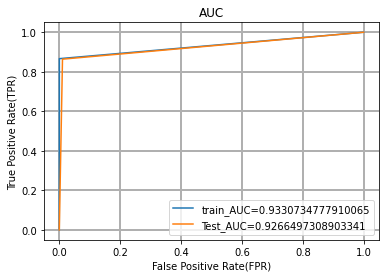

In [31]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [32]:
print("F1-score:",f1_score(y_test,y_test_pred))

F1-score: 0.9180480971281811


**Decision Tree Classifier**

In [33]:
#ref =https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

params =  {'max_depth':[2,3,5,7,9]}

#The instance of SVC
rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
tree_model = DecisionTreeClassifier(random_state=42)
#Used GridserachCV for Hyper-parameter
grid = GridSearchCV(estimator = tree_model, param_grid = params, scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bigram,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))





Fitting 11 folds for each of 5 candidates, totalling 55 fits
Best Score:0.9040560317149314
Best Parameters: {'max_depth': 9}


In [34]:
tree_clf = DecisionTreeClassifier(max_depth=9)
tree_clf.fit(X_train_bigram,y_train)

y_pred = tree_clf.predict(X_train_bigram)
tree_train_auc = roc_auc_score(y_train,y_pred)
print(tree_train_auc)


0.8521528989065906


In [35]:
y_test_pred = tree_clf.predict(X_test_bigram)
tree_test_auc = roc_auc_score(y_test,y_test_pred)
print(tree_test_auc)

0.852739285331836


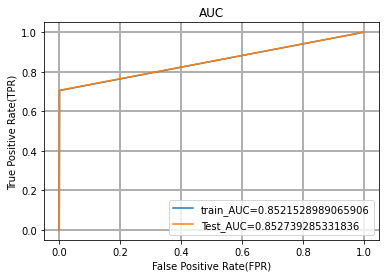

In [36]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [37]:
print("F1-score:",f1_score(y_test,y_test_pred))

F1-score: 0.8271604938271605


**Gradient Boosting Algorithm**

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': [10,20,30,40,50,60],'max_depth':[2,3,5,7]}
rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
gbdt_model = GradientBoostingClassifier(random_state=42)
#Used GridserachCV for Hyper-parameter
grid = GridSearchCV(estimator = gbdt_model, param_grid = params, scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bigram,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))


Fitting 11 folds for each of 24 candidates, totalling 264 fits
Best Score:0.9665290018803556
Best Parameters: {'max_depth': 7, 'n_estimators': 60}


In [39]:
gbdt_clf = GradientBoostingClassifier(max_depth = 7, n_estimators = 60)
gbdt_clf.fit(X_train_bigram,y_train)

y_pred = gbdt_clf.predict(X_train_bigram)
gbdt_train_auc = roc_auc_score(y_train,y_pred)
print(gbdt_train_auc)

0.921954086589794


In [40]:
y_test_pred = gbdt_clf.predict(X_test_bigram)
gbdt_test_auc = roc_auc_score(y_test,y_test_pred)
print(gbdt_test_auc)

0.921188910396065


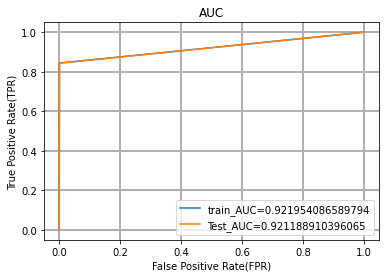

In [41]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [42]:
print("f1-score:",f1_score(y_test,y_test_pred))

f1-score: 0.9142448785135779


**Stacking Classifier**

In [43]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [44]:
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [46]:
#classifier 1
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train_bigram,y_train)

#Classifier 2
model = LogisticRegression(C= 10, penalty = 'l2', solver = 'liblinear')
model.fit(X_train_bigram,y_train)

naive_clf = MultinomialNB(alpha=1e-05)
naive_clf.fit(X_train_bigram,y_train)

#Classifier 3
svc_clf = SVC(C = 1, kernel = 'linear')
svc_clf.fit(X_train_bigram,y_train)

#classifier 4


tree_clf = DecisionTreeClassifier(max_depth = 9)
tree_clf.fit(X_train_bigram,y_train)

#classifier 5
gbdt_clf = GradientBoostingClassifier(max_depth = 7, n_estimators = 60)
gbdt_clf.fit(X_train_bigram,y_train)


#Stacking Classifer

sclf = StackingClassifier(classifiers=[knn_model,model,naive_clf,svc_clf,tree_clf,gbdt_clf],meta_classifier=model)

#fit the model
sclf.fit(X_train_bigram,y_train)

#predict in probabilities

y_pred = sclf.predict(X_train_bigram)


In [47]:
train_auc = roc_auc_score(y_train,y_pred)
print(train_auc)

0.9334537119147208


In [48]:
y_test_pred = sclf.predict(X_test_bigram)
test_auc = roc_auc_score(y_test,y_test_pred)
print(test_auc)

0.9261930408537359


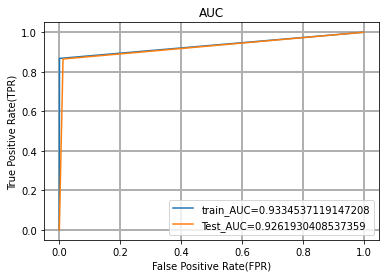

In [49]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [50]:
print("F1 score:",f1_score(y_test,y_test_pred))

F1 score: 0.9170549860205032


### Summary of All Models

In [1]:
from texttable import Texttable
t = Texttable()
t.add_rows([['Model','Hyper-parameter','Train AUC','Test AUC','f1_score'],['Knn_Model',r"{'n_neighbors': 7}",0.89,0.88,0.84],
           ['logistic Regresstion',r"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.93,0.92,0.92],['Support Vector Machine',
           r"{'C': 1, 'kernel': 'linear'}",0.93,0.92,0.91],['Gradient Boosting Algorithm',r"{'max_depth': 7, 'n_estimators': 60}",0.92,0.92,0.91],
            ['Decision_tree Model',r"{'max_depth': 9}",0.85,0.85,0.82],['Naive Bayes',r"{'alpha': 1e-05}",.91,0.91,0.90],
            ['Calibrated Model',"--",0.93,0.92,0.91]])

print(t.draw())

+----------------------+---------------------+-----------+----------+----------+
|        Model         |   Hyper-parameter   | Train AUC | Test AUC | f1_score |
+======================+=====================+===========+==========+==========+
| Knn_Model            | {'n_neighbors': 7}  | 0.890     | 0.880    | 0.840    |
+----------------------+---------------------+-----------+----------+----------+
| logistic Regresstion | {'C': 10,           | 0.930     | 0.920    | 0.920    |
|                      | 'penalty': 'l2',    |           |          |          |
|                      | 'solver':           |           |          |          |
|                      | 'liblinear'}        |           |          |          |
+----------------------+---------------------+-----------+----------+----------+
| Support Vector       | {'C': 1, 'kernel':  | 0.930     | 0.920    | 0.910    |
| Machine              | 'linear'}           |           |          |          |
+----------------------+----

### Observation

We have done text-preprcoessing technique on SQL query and apply Bi_gram to come up with vectorization. 

We have applied 7 Machine learning model such as Knn_Model, Logistic Regression,Support Vector Machine, Gradient Boosting algorithm, Decision_tree model, Naive Bayes Model and calibrated model.

Used AUC as evaluation metrics.

We found Calibrated Model as best model with AUC =0.92 for this experiment.